# 第4章 神经网络的学习

“学习”是指从训练数据中自动获取最优权重参数的过程。

为了使神经网络能进行学习，将导入损失函数这一指标。
学习的目的就是以该损失函数为基准，找出能使它的值达到最小的权重参数。
为了找出尽可能小的损失函数的值，利用了函数斜率的梯度法。

## 4.1 从数据中学习

神经网络的特征就是可以从数据中学习。
学习：从训练数据中自动获取最优权重参数的过程。

### 4.1.1 数据驱动

一种方案是，先从图像中提取特征量，再用机器学习技术学习这些特征量的模式。这里所说的“特征量”是指可以
从输入数据（输入图像）中准确地提取本质数据（重要的数据）的转换器。

![从人工设计规则转变为由机器从数据中学习](../images/图4-2.从人工设计规则转变为由机器从数据中学习：没有人为介入的方块用灰色表示.PNG)

深度学习有时也称为**端到端机器学习**（end-to-end machinelearning）。
这里所说的**端到端**是指从一端到另一端的意思，也就是从原始数据（输入）中获得目标结果（输出）的意思。

神经网络的优点是对所有的问题都可以用同样的流程来解决。

### 4.1.2 训练数据和测试数据

为了正确评价模型的**泛化能力**，就必须划分**训练数据**和**测试数据**。
训练数据也可以称为**监督数据**。

**泛化能力**是指处理未被观察过的数据（不包含在训练数据中的数据）的能力。
获得泛化能力是机器学习的最终目标。

只对某个数据集过度拟合的状态称为**过拟合**（over fitting）。

## 4.2 损失函数

神经网络以某个指标为线索寻找最优权重参数。神经网络的学习中所用的指标称为**损失函数**（loss function）。
这个损失函数可以使用任意函数，但一般用均方误差和交叉熵误差等。

### 4.2.1 均方误差

**均方误差**（mean squared error）

$$ E = \frac{1}{2} \sum_{k}(y_k - t_k)^2 \tag{4.1} $$

$y_k$ 是表示神经网络的输出，$t_k$ 表示监督数据，$k$ 表示数据的维数。


In [1]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

将正确解标签表示为 1，其他标签表示为 0 的表示方法称为 **one-hot表示**。

In [2]:
import numpy as np


# 均方误差
def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t) ** 2)

In [3]:
# 设 “2” 为正确解
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
# 例 1：“2” 的概率最高的情况（0.6）
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [4]:
# 例 2：“7” 的概率最高的情况（0.6）
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.5975

### 4.2.2 交叉熵误差

**交叉熵误差**（cross entropy error）
$$ E = - \sum_k t_k \log y_k \tag{4.2} $$

$log$ 表示以 $e$ 为底数的自然对数（$log_e$）。$y_k$ 是神经网络的输出，$t_k$ 是正确解标签。
并且，$t_k$ 中只有正确解标签的索引为 1，其他均为 0（one-hot 表示）。
实际上只计算对应正确解标签的输出的自然对数。

交叉熵误差的值是由正确解标签所对应的输出结果决定的。

![图 4-3 自然对数 y = log x 的图像](../images/图4-3.自然对数y=logx的图像.PNG)
图4-3.自然对数$y=\log x$的图像

x 等于 1 时，y 为 0；随着 x 向 0 靠近，y 逐渐变小。

函数内部在计算 np.log 时，加上了一个微小值 delta。
因为，当出现 np.log(0) 时，np.log(0) 会变为负无限大的 -inf，
这样一来就会导致后续计算无法进行。作为保护性对策，添加一个微小值可以防止负无限大的发生。

In [5]:
# 交叉熵误差
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [6]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]  # 正确标签对应输出为0.6
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [7]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]  # 正确标签对应输出为0.1
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

### 4.2.3 mini-batch学习

所有训练数据的损失函数的总和
$$ E = - \frac{1}{N} \sum_n \sum_k t_{nk} \log{y_{nk}} \tag{(4.3)} $$

**mini-batch 学习**：神经网络的学习也是从训练数据中选出一批数据（称为 mini-batch, 小批量），然后对每个 mini-batch 进行学习。

In [8]:
import sys, os

sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
print(x_train.shape)  # (60000, 784)
print(t_train.shape)  # (60000, 10)

(60000, 784)
(60000, 10)


In [9]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)  # 返回被选数据的索引的数组
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]
x_batch, t_batch

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]))

In [10]:
np.random.choice(6000, 10)

array([4789, 5863, 5372, 1660, 3395, 4285, 1749, 5090,  110, 3485])

### 4.2.4 mini-batch 版交叉熵误差的实现

In [11]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [12]:
# 当监督数据是标签形式（非 one-hot 表示，而是像“2”“7”这样的标签）时，交叉熵误差的代码实现。
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

### 4.2.5 为何要设定损失函数

“导数”在神经网络学习中的作用。

在神经网络的学习中，寻找最优参数（权重和偏置）时，要寻找使损失函数的值尽可能小的参数。
为了找到使损失函数的值尽可能小的地方，需要计算参数的导数（确切地讲是梯度），然后以这个导数为指引，
逐步更新参数的值。

    在进行神经网络的学习时，不能将识别精度作为指标。因为如果以识别精度为指标，则参数的导数在绝大多数地方都会变为0。

为什么用识别精度作为指标时，参数的导数在绝大多数地方都会变成0?

识别精度对微小的参数变化基本上没有什么反应，即便有反应，它的值也是不连续地、突然地变化。
作为激活函数的阶跃函数也有同样的情况。出于相同的原因，如果使用阶跃函数作为激活函数，神经网络的学习将无法进行。

sigmoid 函数的导数在任何地方都不为0。这对神经网络的学习非常重要。得益于这个斜率不会为0的性质，神经网络的学
习得以正确进行。

![图4-4](../images/图4-4.阶跃函数和sigmoid函数.PNG)
图4-4 阶跃函数和sigmoid函数：阶跃函数的斜率在绝大多数地方都为0，而sigmoid函数的斜率（切线）不会为0

## 4.3 数值微分（numerical differentiation）

梯度算法使用梯度的信息决定前进的方向。

### 4.3.1 导数（derivative）

导数表示某个瞬间的变化量。
导数的定义：

$$  \frac{\mathrm{d} f(x)}{\mathrm{d} x} = \lim_{h\to 0} \frac{f(x+h)-f(x)}{h} \tag{4.4} $$

式（4.4）表示的导数的含义是，x的“微小变化”将导致函数f（x）的值在多大程度上发生变化。

In [13]:
# 不好的实现示例
def numerical_diff(f, x):
    h = 10e-50
    return (f(x + h) - f(x)) / h

函数 numerical_diff(f, x) 的名称来源于**数值微分**的英文 numerical
differentiation。这个函数有两个参数，即“函数 f”和“传给函数 f 的参数 x”。

这段代码有两处需要改进的地方：
* 改进1
h 使用了 10e-50（有 50 个连续的 0 的“0.00 . . . 1”）这个微小值。但
是，这样反而产生了**舍入误差**（rounding error）。所谓舍入误差，是指因省
略小数的精细部分的数值（比如，小数点第 8 位以后的数值）而造成最终的计
算结果上的误差。
将微小值 h 改为 $10^−4$。使用 $10^−4$就可以得到正确的结果。

In [14]:
np.float32(1e-50)

0.0

* 改进2
数值微分含有误差。为了减小这个误差，我们可以计算函数 f 在 (x + h) 和 (x − h) 之间的差分。
因为这种计算方法以 x 为中心，计算它左右两边的差分，所以也称为**中心差分**（而 (x + h) 和 x 之间的差分称为
**前向差分**）

![图 4-5 真的导数（真的切线）和数值微分（近似切线）的值不同](../images/图4-5.真的导数（真的切线）和数值微分（近似切线）的值不同.PNG)

In [15]:
def numerical_diff(f, x):
    h = 1e-4  # 0.0001
    return (f(x + h) - f(x - h)) / (2 * h)

利用微小的差分求导数的过程称为**数值微分**（numerical differentiation）。
而基于数学式的推导求导数的过程，则用“**解析性**”（analytic）一词，称为“解析性求解”或者“解析性求导”。
比如，$y = x^2$ 的导数，可以通过 $\frac{\mathrm d y}{\mathrm d x} = 2x$ 解析性地求解出来。因此，当 x = 2 时，
y 的导数为 4。解析性求导得到的导数是不含误差的“真的导数”。

中心差分
前向差分

### 4.3.2 数值微分的例子
$$ y = 0.01x^2 + 0.1x \tag{4.5} $$

In [16]:
def function_1(x):
    return 0.01 * x ** 2 + 0.1 * x

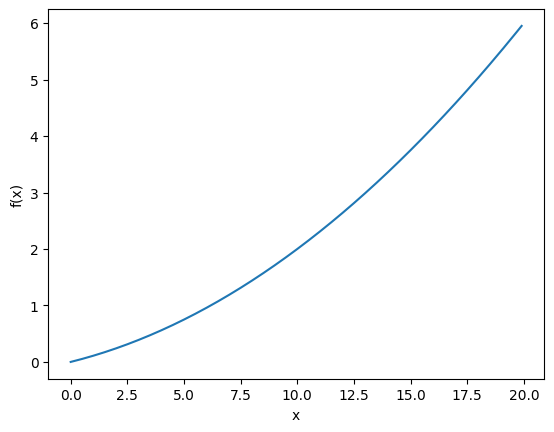

In [17]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)  # 以 0.1 为单位，从 0 到 20 的数组 x
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [18]:
numerical_diff(function_1, 5), numerical_diff(function_1, 10)

(0.1999999999990898, 0.2999999999986347)

### 4.3.3 偏导数

$$ f(x_0, x_1) = x_0^2 + x_1^2 \tag{4.6} $$


In [19]:
def function_2(x):
    return x[0] ** 2 + x[1] ** 2

# 或者 return np.sum(x**2)

![](../images/图4-8.PNG)

有多个变量的函数的导数称为**偏导数**。

用数学式表
示的话，可以写成 $ \frac{\partial f}{\partial x_0}$ 、 $ \frac{\partial f}{\partial x_1}$  。

In [20]:
def function_tmp1(x0):
    return x0 * x0 + 0.4 ** 2.0

In [21]:
numerical_diff(function_tmp1, 3.0)

6.000000000012662

In [22]:
def function_tmp2(x1):
    return 3.0 ** 2.0 + x1 * x1

In [23]:
numerical_diff(function_tmp2, 4.0)

7.999999999999119

## 4.4 梯度

$$ \left (\frac{\partial f}{\partial x_0} , \frac{\partial f}{\partial x_1} \right ) $$

这样的由全部变量的偏导数汇总而成的向量称为**梯度**（gradient）。

In [24]:
# 计算梯度
def numerical_gradient(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)  # 生成和 x 形状相同的数组

    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 的计算
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x-h) 的计算
        x[idx] = tmp_val - h
        fxh2 = f(x)
        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val  # 还原值

    return grad

In [25]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [26]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [27]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

![图4-9](../images/图4-9.png)
图4-9 $f(x_0,x_1)=x_0^2+x_1^2$ 的梯度

梯度指示的方向是各点处的函数值减小最多的方向。

### 4.4.1 梯度法

函数的极小值、最小值以及被称为**鞍点**（saddle point）的地方，梯度为 0。

函数的取值从当前位置沿着梯度方向前进一定距离，然后在新的地方重新求梯度，再沿着新梯度方向前进，
如此反复，不断地沿梯度方向前进。像这样，通过不断地沿梯度方向前进，
逐渐减小函数值的过程就是**梯度法**（gradient method）。梯度法是解决机器
学习中最优化问题的常用方法，特别是在神经网络的学习中经常被使用。

寻找最小值的梯度法称为**梯度下降法**（gradient descent method），
寻找最大值的梯度法称为**梯度上升法**（gradient ascent method）。

$$ x_0 = x_0 - \eta \frac {\partial f}{\partial x_0} \\
    x_1 = x_1 - \eta \frac {\partial f}{\partial x_1} \tag{4.7} $$


$\eta$ 表示更新量，在神经网络的学习中，称为**学习率**（learning rate）。学习率决定在一次学习中，应该学习多少，以及在多大程度上更新参数。

在神经网络的学习中，一般会一边改变学习率的值，一边确认学习是否正确进行了。

In [28]:
# 实现梯度下降法
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    """
    参数 f 是要进行最优化的函数，
    init_x 是初始值，
    lr 是学习率 learning rate，
    step_num 是梯度法的重复次数

    使用这个函数可以求函数的极小值，顺利的话，还可以求函数的最小值。
    """
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x

In [29]:
def function_2(x):
    return x[0] ** 2 + x[1] ** 2

In [30]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [31]:
def function_2(x):
    return x[0] ** 2 + x[1] ** 2

In [32]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

![图 4-10](../images/图4-10.PNG)

In [33]:
# 学习率过大或者过小都无法得到好的结果

# 学习率过大的例子：lr=10.0
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [34]:
# 学习率过小的例子：lr=1e-10
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

实验结果表明，学习率过大的话，会发散成一个很大的值；
反过来，学习率过小的话，基本上没怎么更新就结束了。
也就是说，设定合适的学习率是一个很重要的问题。

像学习率这样的参数称为**超参数**。这是一种和神经网络的参数（权重
和偏置）性质不同的参数。相对于神经网络的权重参数是通过训练
数据和学习算法自动获得的，学习率这样的超参数则是人工设定的。
一般来说，超参数需要尝试多个值，以便找到一种可以使学习顺利
进行的设定。

### 4.4.2 神经网络的梯度

神经网络的学习也要求梯度。这里所说的梯度是指损失函数关于权重参数的梯度。

有一个只有一个形状为 2 × 3 的权重 $W$ 的神经网络，损失函数用 $L$ 表示。
此时，梯度可以用 $\frac{\partial L}{\partial W}$表示。

$$
W =
\begin{pmatrix}
 w_{11} & w_{12} & w_{13} \\
 w_{21} & w_{22} & w_{23} \\
\end{pmatrix}
\\
\frac{\partial L}{\partial W} =

\begin{pmatrix}
 \frac{\partial L}{\partial w_{11}} & \frac{\partial L}{\partial w_{12}} & \frac{\partial L}{\partial w_{13}} \\
 \frac{\partial L}{\partial w_{21}} & \frac{\partial L}{\partial w_{22}} & \frac{\partial L}{\partial w_{23}} \\
\end{pmatrix}

\tag{4.8}
$$

$\frac{\partial L}{\partial W}$ 的元素由各个元素关于 $W$ 的偏导数构成。
$\frac{\partial L}{\partial w_{11}}$ 表示当 $w_{11}$ 稍微变化时，损失函数 $L$ 会发生多大变化。

In [35]:
import sys, os

sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)  # 用高斯分布进行初始化

    # 预测
    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss

In [36]:
net = simpleNet()
print(net.W)  # 权重参数

[[-0.41313515  0.79393902  1.46035548]
 [ 0.21521711 -0.18401158  0.71473986]]


In [37]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[-0.05418569  0.31075298  1.51947917]


In [38]:
np.argmax(p)  # 最大值的索引

2

In [39]:
t = np.array([0, 0, 1])  # 正确解标签
net.loss(x, t)

0.40936500393647984

In [40]:
def f(W):
    return net.loss(x, t)

In [41]:
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.0825909   0.11896605 -0.20155695]
 [ 0.12388635  0.17844908 -0.30233543]]


In [42]:
# Python 中如果定义的是简单的函数，可以使用 lambda 表示法。
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

## 4.5 学习算法的实现

### 神经网络的学习步骤

#### 前提
    神经网络存在合适的权重和偏置，调整权重和偏置以便拟合训练数据的
    过程称为“学习”。神经网络的学习分成下面 4 个步骤。
#### 步骤 1（mini-batch）
    从训练数据中随机选出一部分数据，这部分数据称为 mini-batch。我们
    的目标是减小 mini-batch 的损失函数的值。
#### 步骤 2（计算梯度）
    为了减小 mini-batch 的损失函数的值，需要求出各个权重参数的梯度。
    梯度表示损失函数的值减小最多的方向。
#### 步骤 3（更新参数）
    将权重参数沿梯度方向进行微小更新
#### 步骤 4（重复）
    重复步骤 1、步骤 2、步骤 3。

使用的数据是随机选择的mini batch数据，所以又称为**随机梯度下降法**（stochastic gradient descent，SGD）。

### 4.5.1 2层神经网络的类

In [43]:
from ch04.two_layer_net import TwoLayerNet

net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
net.params['W1'].shape  # (784, 100)
net.params['b1'].shape  # (100,)
net.params['W2'].shape  # (100, 10)
net.params['b2'].shape  # (10,)

(10,)

In [44]:
x = np.random.rand(100, 784)  # 伪输入数据（100 笔）
y = net.predict(x)

In [45]:
x = np.random.rand(100, 784)  # 伪输入数据（100 笔）
t = np.random.rand(100, 10)  # 伪正确解标签（100 笔）
grads = net.numerical_gradient(x, t)  # 计算梯度
grads['W1'].shape  # (784, 100)
grads['b1'].shape  # (100,)
grads['W2'].shape  # (100, 10)
grads['b2'].shape  # (10,)
print('jj')

jj


### 4.5.2 mini-batch的实现

mini-batch学习：从训练数据中随机选择一部分数据（称为mini-batch），
再以这些mini-batch为对象，使用梯度法更新参数的过程。

![图4-11.损失函数的推移](../images/图4-11.损失函数的推移.PNG)
图4-11　损失函数的推移

### 4.5.3 基于测试数据的评价


In [48]:
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []
train_acc_list = []
test_acc_list = []
# 平均每个epoch的重复次数
iter_per_epoch = max(train_size / batch_size, 1)

# 超参数
iters_num = 10000
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # 获取mini-batch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 计算梯度
    # grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)  # 高速版

    # 更新参数
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    # 计算每个epoch的识别精度
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.10441666666666667, 0.1028
train acc, test acc | 0.7903833333333333, 0.7941
train acc, test acc | 0.8765, 0.8816
train acc, test acc | 0.8996, 0.9041
train acc, test acc | 0.9082333333333333, 0.9129
train acc, test acc | 0.9146333333333333, 0.9186
train acc, test acc | 0.91885, 0.9213
train acc, test acc | 0.9244, 0.9255
train acc, test acc | 0.9275, 0.9284
train acc, test acc | 0.9310833333333334, 0.9316
train acc, test acc | 0.9340166666666667, 0.9358
train acc, test acc | 0.93595, 0.937
train acc, test acc | 0.93925, 0.9405
train acc, test acc | 0.9409666666666666, 0.9413
train acc, test acc | 0.94325, 0.9445
train acc, test acc | 0.9461333333333334, 0.9452
train acc, test acc | 0.9480333333333333, 0.947



![图4-12.训练数据和测试数据的识别精度的推移（横轴的单位是epoch）](../images/图4-12.训练数据和测试数据的识别精度的推移（横轴的单位是epoch）.PNG)
图4-12.训练数据和测试数据的识别精度的推移（横轴的单位是epoch）

## 4.6 小结

* 机器学习中使用的数据集分为训练数据和测试数据。
* 神经网络用训练数据进行学习，并用测试数据评价学习到的模型的泛化能力。
* 神经网络的学习以损失函数为指标，更新权重参数，以使损失函数的值减小。
* 利用某个给定的微小值的差分求导数的过程，称为数值微分。
* 利用数值微分，可以计算权重参数的梯度。
* 数值微分虽然费时间，但是实现起来很简单。下一章中要实现的稍
微复杂一些的误差反向传播法可以高速地计算梯度。